In [1]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re as re

In [2]:
#import the national dex file
Pokedex_prime = pd.read_csv("national_dex_extended.csv")

# Project Overview

## Objective:

### 1. Compare the stats of the top 10 pokemon with the highest Base Stat Total.
### 2. Compare the frequency of the flying type as a primary or secondary typing.


We'll start by getting a general feeling of the data.

*Note:*  The following data set is from Kaggel (https://www.kaggle.com/datasets/alejandromatias/national-dex-from-serebii-net). While it does contain every pokemon from the national dex
it does not consider Mega pokemon or regional forms.

In [3]:
Pokedex_prime.head(3)

,National Dex Number,Pokemon Name,Pokemon Pic URL,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,#0001,Bulbasaur,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,#0002,Ivysaur,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,#0003,Venusaur,https://www.serebii.net/pokedex-sv/icon/new/00...,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"


In [4]:
Pokedex_prime.tail(5)

,National Dex Number,Pokemon Name,Pokemon Pic URL,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
1020,#1021,Raging Bolt,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/elec...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']"
1021,#1022,Iron Boulder,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/rock...,['Quark Drive'],"['90', '120', '80', '68', '108', '124']"
1022,#1023,Iron Crown,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/stee...,['Quark Drive'],"['90', '72', '100', '122', '108', '98']"
1023,#1024,Terapagos,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/norm...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']"
1024,#1025,Pecharunt,https://www.serebii.net/pokedex-sv/icon/new/10...,['https://www.serebii.net/pokedex-bw/type/pois...,['Poison Puppeteer'],"['88', '88', '160', '88', '88', '88']"


In [5]:
#Find the number of rows and columns
df_shape = Pokedex_prime.shape
print(f'The number of rows are {df_shape[0]} and the number of columns are {df_shape[1]}')

The number of rows are 1025 and the number of columns are 6


In [6]:
Pokedex_prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   National Dex Number                         1025 non-null   object
 1   Pokemon Name                                1025 non-null   object
 2   Pokemon Pic URL                             1025 non-null   object
 3   Pokemon Types                               1025 non-null   object
 4   Abilities                                   1025 non-null   object
 5   Base Stats (HP, Atk, Def, SpA, SpD, Speed)  1025 non-null   object
dtypes: object(6)
memory usage: 48.2+ KB


In [7]:
#check if any values are null
Pokedex_prime.isnull().any().any()

np.False_

# Cleaning the data:
- Drop columns not needed.
- Remove irrelivant characters from Pokemon types and Base Stat values
- Seperate Pokemon Types into Type 1 and Type 2
- Seperate the Base Stat Values into their own seperate columns.

In [8]:
# Drop columns that are not necessary
Pokedex_cut = Pokedex_prime.drop(['Pokemon Pic URL','National Dex Number'],axis=1)


In [9]:
Pokedex_cut.head()

,Pokemon Name,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,Bulbasaur,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,Ivysaur,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,Venusaur,['https://www.serebii.net/pokedex-bw/type/gras...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"
3,Charmander,['https://www.serebii.net/pokedex-bw/type/fire...,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']"
4,Charmeleon,['https://www.serebii.net/pokedex-bw/type/fire...,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']"


In [10]:
Pokedex_cut.dtypes

Pokemon Name                                  object
Pokemon Types                                 object
Abilities                                     object
Base Stats (HP, Atk, Def, SpA, SpD, Speed)    object
dtype: object

In [11]:
#Funtion used to remove redundant brackets, quote marks, and commas
def clean_brackets(x):
   x = x.replace("[","")
   x = x.replace("'","")
   x = x.replace("]","")
   x = x.replace(",","")
   return x

In [12]:
Pokedex_cut['Pokemon Types'] = Pokedex_cut['Pokemon Types'].apply(lambda x : clean_brackets(x))

In [13]:
Pokedex_cut

,Pokemon Name,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,Bulbasaur,https://www.serebii.net/pokedex-bw/type/grass....,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,Ivysaur,https://www.serebii.net/pokedex-bw/type/grass....,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,Venusaur,https://www.serebii.net/pokedex-bw/type/grass....,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"
3,Charmander,https://www.serebii.net/pokedex-bw/type/fire.gif,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']"
4,Charmeleon,https://www.serebii.net/pokedex-bw/type/fire.gif,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']"
...,...,...,...,...
1020,Raging Bolt,https://www.serebii.net/pokedex-bw/type/electr...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']"
1021,Iron Boulder,https://www.serebii.net/pokedex-bw/type/rock.g...,['Quark Drive'],"['90', '120', '80', '68', '108', '124']"
1022,Iron Crown,https://www.serebii.net/pokedex-bw/type/steel....,['Quark Drive'],"['90', '72', '100', '122', '108', '98']"
1023,Terapagos,https://www.serebii.net/pokedex-bw/type/normal...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']"


In [14]:
#seperates the Type 1 and Type 2
Pokedex_cut['Pokemon Types'] = Pokedex_cut['Pokemon Types'].apply(lambda x : x.split(' '))

In [15]:
Pokedex_cut

,Pokemon Name,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)"
0,Bulbasaur,[https://www.serebii.net/pokedex-bw/type/grass...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']"
1,Ivysaur,[https://www.serebii.net/pokedex-bw/type/grass...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']"
2,Venusaur,[https://www.serebii.net/pokedex-bw/type/grass...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']"
3,Charmander,[https://www.serebii.net/pokedex-bw/type/fire....,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']"
4,Charmeleon,[https://www.serebii.net/pokedex-bw/type/fire....,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']"
...,...,...,...,...
1020,Raging Bolt,[https://www.serebii.net/pokedex-bw/type/elect...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']"
1021,Iron Boulder,[https://www.serebii.net/pokedex-bw/type/rock....,['Quark Drive'],"['90', '120', '80', '68', '108', '124']"
1022,Iron Crown,[https://www.serebii.net/pokedex-bw/type/steel...,['Quark Drive'],"['90', '72', '100', '122', '108', '98']"
1023,Terapagos,[https://www.serebii.net/pokedex-bw/type/norma...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']"


In [16]:
Pokedex_cut[['Type 1', 'Type 2']] = Pokedex_cut['Pokemon Types'].apply(lambda x : pd.Series(x))

In [17]:
Pokedex_cut

,Pokemon Name,Pokemon Types,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,[https://www.serebii.net/pokedex-bw/type/grass...,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",https://www.serebii.net/pokedex-bw/type/grass.gif,https://www.serebii.net/pokedex-bw/type/poison...
1,Ivysaur,[https://www.serebii.net/pokedex-bw/type/grass...,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",https://www.serebii.net/pokedex-bw/type/grass.gif,https://www.serebii.net/pokedex-bw/type/poison...
2,Venusaur,[https://www.serebii.net/pokedex-bw/type/grass...,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",https://www.serebii.net/pokedex-bw/type/grass.gif,https://www.serebii.net/pokedex-bw/type/poison...
3,Charmander,[https://www.serebii.net/pokedex-bw/type/fire....,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",https://www.serebii.net/pokedex-bw/type/fire.gif,NaN
4,Charmeleon,[https://www.serebii.net/pokedex-bw/type/fire....,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",https://www.serebii.net/pokedex-bw/type/fire.gif,NaN
...,...,...,...,...,...,...
1020,Raging Bolt,[https://www.serebii.net/pokedex-bw/type/elect...,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']",https://www.serebii.net/pokedex-bw/type/electr...,https://www.serebii.net/pokedex-bw/type/dragon...
1021,Iron Boulder,[https://www.serebii.net/pokedex-bw/type/rock....,['Quark Drive'],"['90', '120', '80', '68', '108', '124']",https://www.serebii.net/pokedex-bw/type/rock.gif,https://www.serebii.net/pokedex-bw/type/psychi...
1022,Iron Crown,[https://www.serebii.net/pokedex-bw/type/steel...,['Quark Drive'],"['90', '72', '100', '122', '108', '98']",https://www.serebii.net/pokedex-bw/type/steel.gif,https://www.serebii.net/pokedex-bw/type/psychi...
1023,Terapagos,[https://www.serebii.net/pokedex-bw/type/norma...,['Tera Shift'],"['90', '65', '85', '65', '85', '60']",https://www.serebii.net/pokedex-bw/type/normal...,NaN


In [18]:
#Removes redundant data.
Pokedex_cut = Pokedex_cut.drop('Pokemon Types', axis=1)

In [19]:
Pokedex_cut

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",https://www.serebii.net/pokedex-bw/type/grass.gif,https://www.serebii.net/pokedex-bw/type/poison...
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",https://www.serebii.net/pokedex-bw/type/grass.gif,https://www.serebii.net/pokedex-bw/type/poison...
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",https://www.serebii.net/pokedex-bw/type/grass.gif,https://www.serebii.net/pokedex-bw/type/poison...
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",https://www.serebii.net/pokedex-bw/type/fire.gif,NaN
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",https://www.serebii.net/pokedex-bw/type/fire.gif,NaN
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']",https://www.serebii.net/pokedex-bw/type/electr...,https://www.serebii.net/pokedex-bw/type/dragon...
1021,Iron Boulder,['Quark Drive'],"['90', '120', '80', '68', '108', '124']",https://www.serebii.net/pokedex-bw/type/rock.gif,https://www.serebii.net/pokedex-bw/type/psychi...
1022,Iron Crown,['Quark Drive'],"['90', '72', '100', '122', '108', '98']",https://www.serebii.net/pokedex-bw/type/steel.gif,https://www.serebii.net/pokedex-bw/type/psychi...
1023,Terapagos,['Tera Shift'],"['90', '65', '85', '65', '85', '60']",https://www.serebii.net/pokedex-bw/type/normal...,NaN


In [20]:
#Function to clean up the URLs
def clean_url(text):
    if text == 'Uknown':
        return text
    else:    
        result = text.replace('https://www.serebii.net/pokedex-bw/type/', "")
        result = result.replace('.gif',"")
        return  result

In [21]:
Pokedex_cut['Type 1'] = Pokedex_cut['Type 1'].apply(lambda x : clean_url(x))

In [22]:
Pokedex_cut

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",grass,https://www.serebii.net/pokedex-bw/type/poison...
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",grass,https://www.serebii.net/pokedex-bw/type/poison...
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",grass,https://www.serebii.net/pokedex-bw/type/poison...
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",fire,NaN
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",fire,NaN
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"['125', '73', '91', '137', '89', '75']",electric,https://www.serebii.net/pokedex-bw/type/dragon...
1021,Iron Boulder,['Quark Drive'],"['90', '120', '80', '68', '108', '124']",rock,https://www.serebii.net/pokedex-bw/type/psychi...
1022,Iron Crown,['Quark Drive'],"['90', '72', '100', '122', '108', '98']",steel,https://www.serebii.net/pokedex-bw/type/psychi...
1023,Terapagos,['Tera Shift'],"['90', '65', '85', '65', '85', '60']",normal,NaN


In [23]:
#check for null values in 'Type 2'
Pokedex_cut.isnull().sum()

Pokemon Name                                    0
Abilities                                       0
Base Stats (HP, Atk, Def, SpA, SpD, Speed)      0
Type 1                                          0
Type 2                                        499
dtype: int64

In [24]:
#Replace null values with 'None'
Pokedex_cut['Type 2'] = Pokedex_cut['Type 2'].fillna('None')

In [25]:
Pokedex_cut.head(5)

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",grass,https://www.serebii.net/pokedex-bw/type/poison...
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",grass,https://www.serebii.net/pokedex-bw/type/poison...
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",grass,https://www.serebii.net/pokedex-bw/type/poison...
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",fire,None
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",fire,None


In [26]:
Pokedex_cut['Type 2'] = Pokedex_cut['Type 2'].apply(lambda x : clean_url(x))

In [27]:
Pokedex_cut.head(5)

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","['45', '49', '49', '65', '65', '45']",grass,poison
1,Ivysaur,"['Overgrow', 'Chlorophyll']","['60', '62', '63', '80', '80', '60']",grass,poison
2,Venusaur,"['Overgrow', 'Chlorophyll']","['80', '82', '83', '100', '100', '80']",grass,poison
3,Charmander,"['Blaze', 'Solar Power']","['39', '52', '43', '60', '50', '65']",fire,None
4,Charmeleon,"['Blaze', 'Solar Power']","['58', '64', '58', '80', '65', '80']",fire,None


In [28]:
#Make base stats useable by splitting up the values
Pokedex_cut['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'] = Pokedex_cut['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : clean_brackets(x))
Pokedex_cut['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'] = Pokedex_cut['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : x.split(' '))
#Convert Base Stats to integers
Pokedex_cut['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'] = Pokedex_cut['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : list(map(int, x)))

In [29]:
Pokedex_cut

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","[45, 49, 49, 65, 65, 45]",grass,poison
1,Ivysaur,"['Overgrow', 'Chlorophyll']","[60, 62, 63, 80, 80, 60]",grass,poison
2,Venusaur,"['Overgrow', 'Chlorophyll']","[80, 82, 83, 100, 100, 80]",grass,poison
3,Charmander,"['Blaze', 'Solar Power']","[39, 52, 43, 60, 50, 65]",fire,None
4,Charmeleon,"['Blaze', 'Solar Power']","[58, 64, 58, 80, 65, 80]",fire,None
...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"[125, 73, 91, 137, 89, 75]",electric,dragon
1021,Iron Boulder,['Quark Drive'],"[90, 120, 80, 68, 108, 124]",rock,psychic
1022,Iron Crown,['Quark Drive'],"[90, 72, 100, 122, 108, 98]",steel,psychic
1023,Terapagos,['Tera Shift'],"[90, 65, 85, 65, 85, 60]",normal,None


In [30]:
Pokedex_cut[['HP','Atk','Def','SpA','SpD','Speed']] = Pokedex_cut['Base Stats (HP, Atk, Def, SpA, SpD, Speed)'].apply(lambda x : pd.Series(x))

In [31]:
Pokedex_cut

,Pokemon Name,Abilities,"Base Stats (HP, Atk, Def, SpA, SpD, Speed)",Type 1,Type 2,HP,Atk,Def,SpA,SpD,Speed
0,Bulbasaur,"['Overgrow', 'Chlorophyll']","[45, 49, 49, 65, 65, 45]",grass,poison,45,49,49,65,65,45
1,Ivysaur,"['Overgrow', 'Chlorophyll']","[60, 62, 63, 80, 80, 60]",grass,poison,60,62,63,80,80,60
2,Venusaur,"['Overgrow', 'Chlorophyll']","[80, 82, 83, 100, 100, 80]",grass,poison,80,82,83,100,100,80
3,Charmander,"['Blaze', 'Solar Power']","[39, 52, 43, 60, 50, 65]",fire,None,39,52,43,60,50,65
4,Charmeleon,"['Blaze', 'Solar Power']","[58, 64, 58, 80, 65, 80]",fire,None,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],"[125, 73, 91, 137, 89, 75]",electric,dragon,125,73,91,137,89,75
1021,Iron Boulder,['Quark Drive'],"[90, 120, 80, 68, 108, 124]",rock,psychic,90,120,80,68,108,124
1022,Iron Crown,['Quark Drive'],"[90, 72, 100, 122, 108, 98]",steel,psychic,90,72,100,122,108,98
1023,Terapagos,['Tera Shift'],"[90, 65, 85, 65, 85, 60]",normal,None,90,65,85,65,85,60


In [32]:
Pokedex_cut = Pokedex_cut.drop('Base Stats (HP, Atk, Def, SpA, SpD, Speed)',axis=1)

In [33]:
#Data has been cleaned
Pokedex = Pokedex_cut
Pokedex

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,SpD,Speed
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,45,49,49,65,65,45
1,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,60,62,63,80,80,60
2,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,80,82,83,100,100,80
3,Charmander,"['Blaze', 'Solar Power']",fire,None,39,52,43,60,50,65
4,Charmeleon,"['Blaze', 'Solar Power']",fire,None,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],electric,dragon,125,73,91,137,89,75
1021,Iron Boulder,['Quark Drive'],rock,psychic,90,120,80,68,108,124
1022,Iron Crown,['Quark Drive'],steel,psychic,90,72,100,122,108,98
1023,Terapagos,['Tera Shift'],normal,None,90,65,85,65,85,60


## Now that the data is more useable lets do some analysis.

- Find the Base Stat Totals (BST) by finding the sum of each pokemons stats.
- Compare the stats of the top 10 pokemon with the highest BST.
- Look at type variety
- Compare the number of Flying types that are primary and secondary.

In [34]:
#Add a column for Base Stat Totals (BST)
Pokedex['BST'] = Pokedex[['HP','Atk','Def','SpA','SpD','Speed']].sum(axis=1)

In [35]:
Pokedex

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,SpD,Speed,BST
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",grass,poison,45,49,49,65,65,45,318
1,Ivysaur,"['Overgrow', 'Chlorophyll']",grass,poison,60,62,63,80,80,60,405
2,Venusaur,"['Overgrow', 'Chlorophyll']",grass,poison,80,82,83,100,100,80,525
3,Charmander,"['Blaze', 'Solar Power']",fire,None,39,52,43,60,50,65,309
4,Charmeleon,"['Blaze', 'Solar Power']",fire,None,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...
1020,Raging Bolt,['Protosynthesis'],electric,dragon,125,73,91,137,89,75,590
1021,Iron Boulder,['Quark Drive'],rock,psychic,90,120,80,68,108,124,590
1022,Iron Crown,['Quark Drive'],steel,psychic,90,72,100,122,108,98,590
1023,Terapagos,['Tera Shift'],normal,None,90,65,85,65,85,60,450


In [36]:
Pokedex.shape

(1025, 11)

In [37]:
Pokedex.describe()

,HP,Atk,Def,SpA,SpD,Speed,BST
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,70.184390,77.521951,72.507317,70.080976,70.205854,67.186341,427.686829
std,26.631054,29.782541,29.286972,29.658378,26.639329,28.717227,112.770735
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,325.000000
50%,68.000000,75.000000,70.000000,65.000000,67.000000,65.000000,450.000000
75%,85.000000,100.000000,90.000000,90.000000,86.000000,88.000000,508.000000
max,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000


In [38]:
Pokedex_BST = Pokedex.sort_values(by='BST',ascending=False).head(10)

In [39]:
Pokedex_BST = Pokedex_BST.sort_values(by='BST',ascending=True).head(10)
Pokedex_BST

,Pokemon Name,Abilities,Type 1,Type 2,HP,Atk,Def,SpA,SpD,Speed,BST
716,Yveltal,['Dark Aura'],dark,flying,126,131,95,131,98,99,680
383,Rayquaza,['Air Lock'],dragon,flying,105,150,90,150,90,95,680
482,Dialga,"['Pressure', 'Telepathy']",steel,dragon,100,120,120,150,100,90,680
483,Palkia,"['Pressure', 'Telepathy']",water,dragon,90,120,100,150,120,100,680
486,Giratina,"['Pressure', 'Telepathy']",ghost,dragon,150,100,120,100,120,90,680
248,Lugia,"['Pressure', 'Multiscale']",psychic,flying,106,90,130,90,154,110,680
249,Ho-Oh,"['Pressure', 'Regenerator']",fire,flying,106,130,90,110,154,90,680
791,Lunala,['Shadow Shield'],psychic,ghost,137,113,89,137,107,97,680
889,Eternatus,['Pressure'],poison,dragon,140,85,95,145,95,130,690
492,Arceus,['Multitype'],normal,None,120,120,120,120,120,120,720


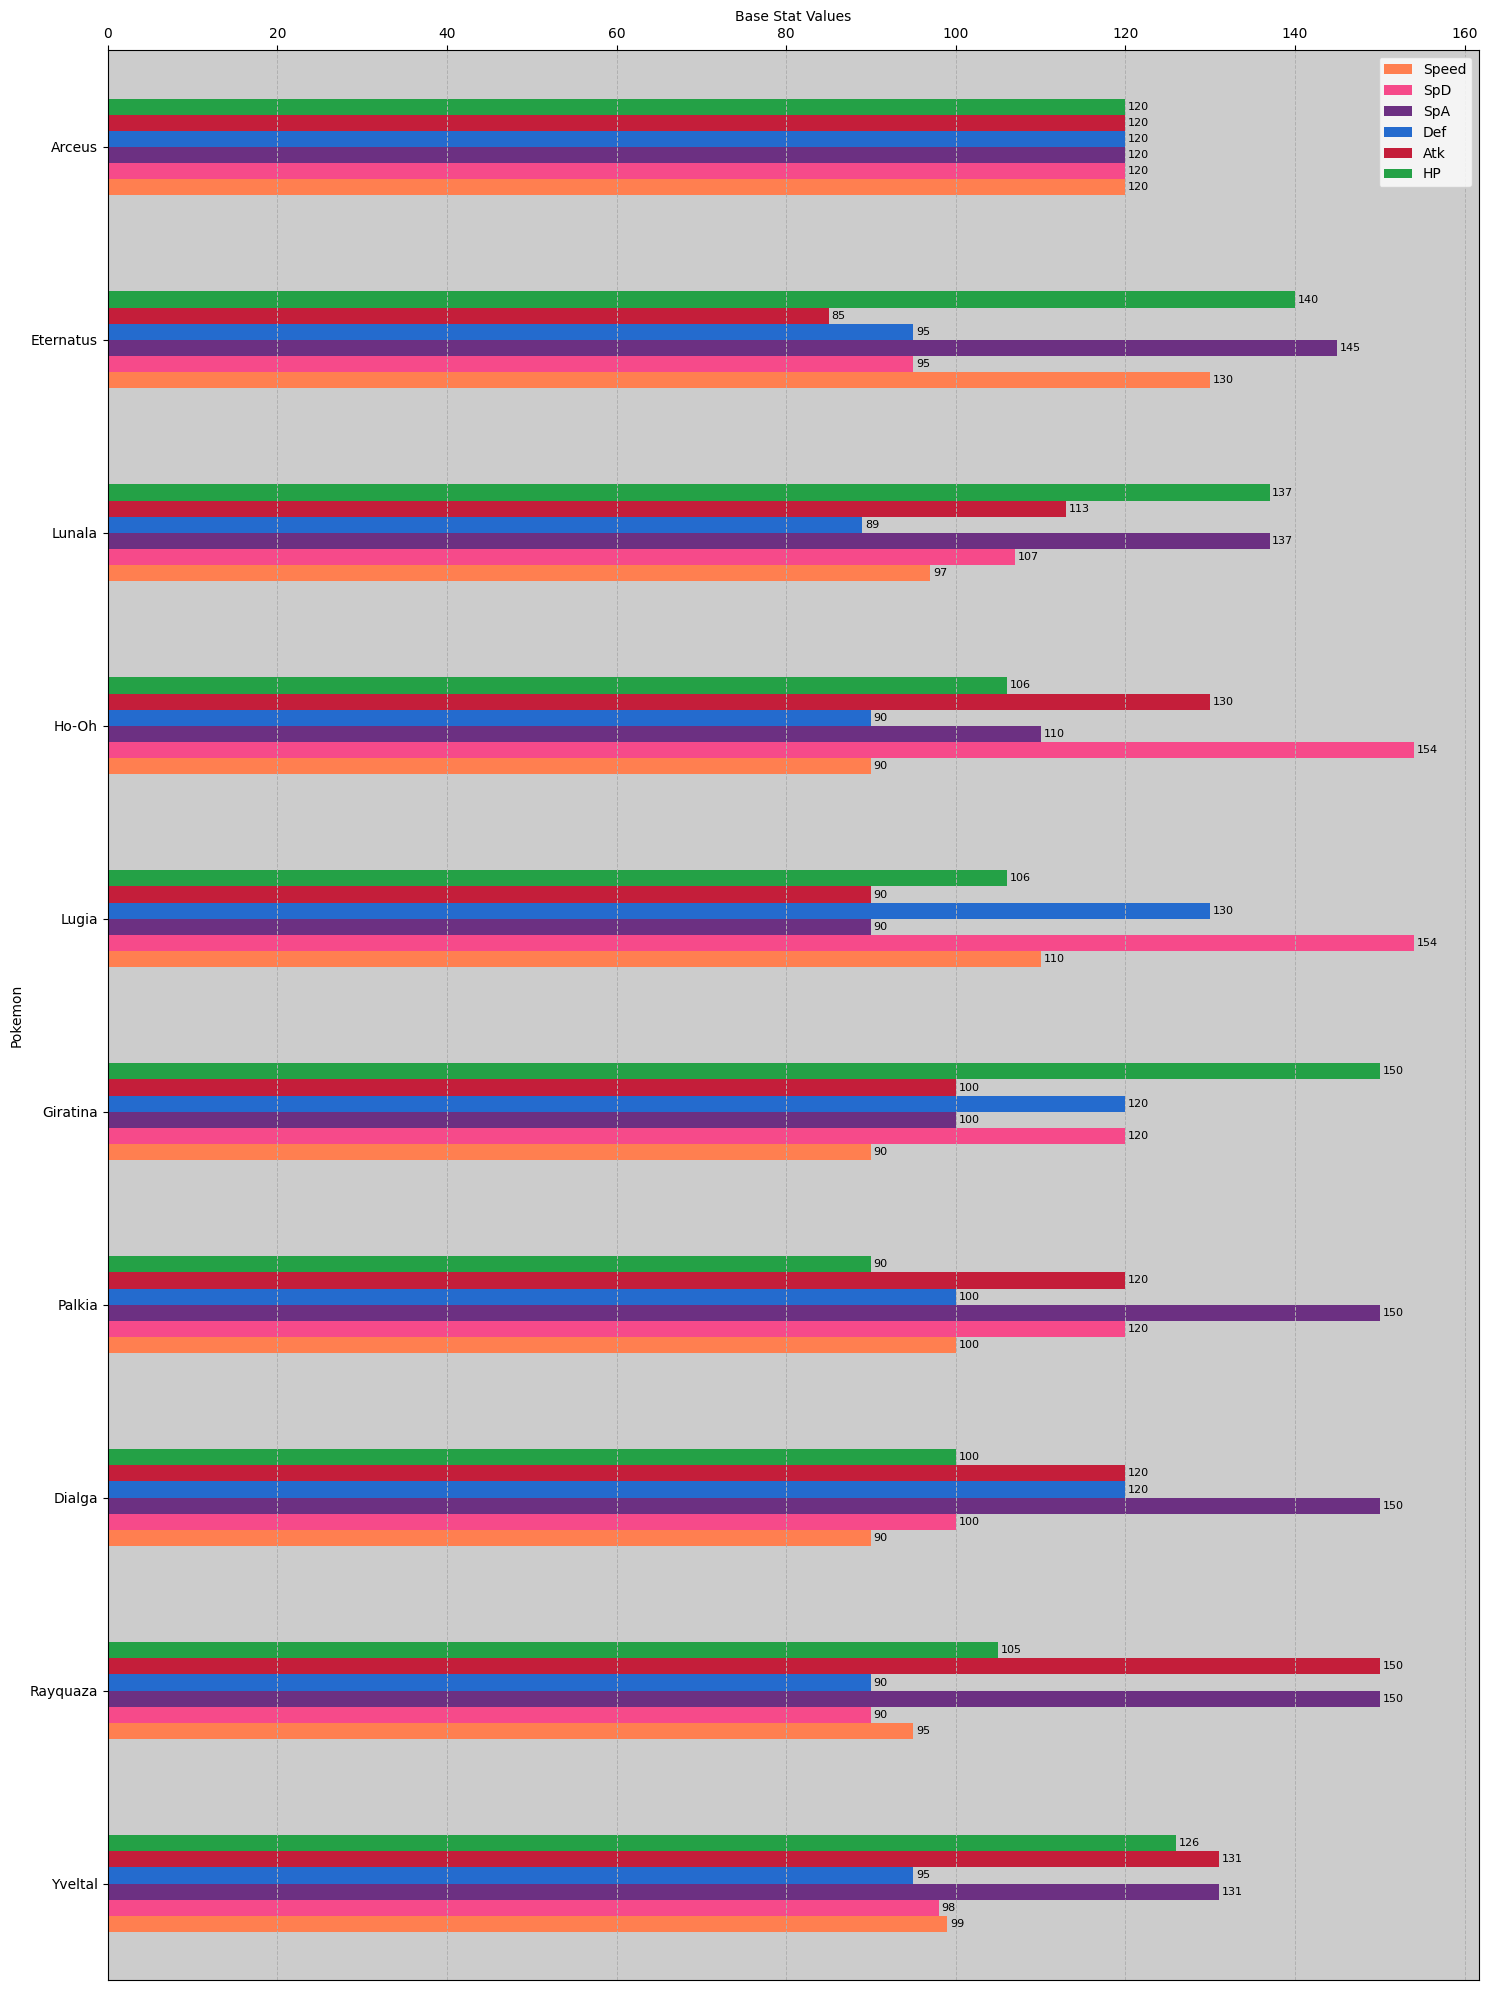

In [62]:
ax = Pokedex_BST.plot(
    kind='barh',
    x='Pokemon Name', 
    y=['Speed','SpD','SpA','Def','Atk','HP'],
    rot=0, 
    color=['#ff7f50','#f64a8a','#6c3082','#246bce','#c41e3a','#24a146'], 
    figsize=(15,20)
)


ax.set_xlabel('Base Stat Values')  # Set the x-label
ax.set_ylabel('Pokemon')  # Set the y-label
ax.xaxis.set_label_position('top')  # Move the x-label to the top
ax.xaxis.tick_top()
ax.set_facecolor('#cccccc')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=2)

plt.tight_layout()  # Adjust layout to avoid overlapping labels
plt.show()          # Display the plot